In [18]:
# 發送 HTTP 請求以獲取網路上的資料
import requests

# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

In [24]:
# "鴻海"股票代號
stock_id = '2317'

# 獲取今天的日期（型別：str）
date = dt.date.today().strftime("%Y%m%d")

print('今日日期：', date)

# 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
# https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
stock_data = requests.get(f'https://www.twse.com.tw/rwd/zh/ \
            afterTrading/STOCK_DAY?date={date}&stockNo={stock_id}')

# 將結果轉換 JSON 格式
json_data = stock_data.json()

# 將 JSON 格式轉換爲 Dataframe 格式，
# 方便在 Python 中處理結構化資料
df = pd.DataFrame(data=json_data['data'],
                  columns=json_data['fields'])

df

今日日期： 20250915


,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,114/09/01,"70,459,817","14,078,205,621",203.00,204.50,197.00,198.50,-5.00,"71,939"
1,114/09/02,"35,779,045","7,156,125,061",200.00,203.50,198.00,198.50,0.00,"34,355"
2,114/09/03,"34,371,962","6,872,038,310",198.50,201.00,197.00,200.50,+2.00,"27,080"
3,114/09/04,"41,864,177","8,521,942,683",203.00,205.00,202.00,203.00,+2.50,"31,214"
4,114/09/05,"39,235,404","8,029,752,712",205.50,206.50,203.00,205.00,+2.00,"28,923"
5,114/09/08,"45,711,589","9,334,946,908",206.00,207.50,202.00,203.50,-1.50,"50,746"
6,114/09/09,"64,990,917","13,418,391,286",204.50,208.00,204.00,207.50,+4.00,"49,854"
7,114/09/10,"86,104,648","18,091,486,378",211.00,211.00,209.00,210.00,+2.50,"59,270"
8,114/09/11,"133,210,297","28,371,439,699",212.00,216.50,209.00,214.50,+4.50,"110,323"
9,114/09/12,"74,001,120","16,094,789,200",217.00,218.50,216.50,217.50,+3.00,"59,880"


In [25]:
def convert_minguo_to_ad(date_str):
    # 113/09/10 透過「/」分割成清單 [113, 09, 10]
    # 分配給變數 year=113, month=09, day=10
    year, month, day = date_str.split('/')
    ad_year = int(year) + 1911  # 將民國年轉換為西元年
    return f"{ad_year}/{month}/{day}"

# 所有民國日期都轉西元日期 e.g.113/09/10 -> 2024/09/10
df['日期'] = df['日期'].apply(convert_minguo_to_ad)

# 轉換為 pandas 中的 datetime 格式
df['日期'] = pd.to_datetime(df['日期'], format='%Y/%m/%d')

start_date = '2025/09/01'
end_date = '2025/09/15'

# 篩選日期
filtered_df = df[(df['日期'] >= start_date) & (df['日期'] <= end_date)]

print(filtered_df)

           日期         成交股數            成交金額     開盤價     最高價     最低價     收盤價  \
0  2025-09-01   70,459,817  14,078,205,621  203.00  204.50  197.00  198.50   
1  2025-09-02   35,779,045   7,156,125,061  200.00  203.50  198.00  198.50   
2  2025-09-03   34,371,962   6,872,038,310  198.50  201.00  197.00  200.50   
3  2025-09-04   41,864,177   8,521,942,683  203.00  205.00  202.00  203.00   
4  2025-09-05   39,235,404   8,029,752,712  205.50  206.50  203.00  205.00   
5  2025-09-08   45,711,589   9,334,946,908  206.00  207.50  202.00  203.50   
6  2025-09-09   64,990,917  13,418,391,286  204.50  208.00  204.00  207.50   
7  2025-09-10   86,104,648  18,091,486,378  211.00  211.00  209.00  210.00   
8  2025-09-11  133,210,297  28,371,439,699  212.00  216.50  209.00  214.50   
9  2025-09-12   74,001,120  16,094,789,200  217.00  218.50  216.50  217.50   
10 2025-09-15   56,651,315  12,223,562,936  218.50  218.50  213.00  216.00   

     漲跌價差     成交筆數  
0   -5.00   71,939  
1    0.00   34,355  


In [21]:
# 設定查找時間
date_list = ['20250601','20250701', '20250801', '20250901']

all_df = pd.DataFrame()

# 使用迴圈抓取連續月份資料
for date in date_list:
    # 取得證交所網站資料，帶入網址參數 date：時間，stock_id：股票代號
    # https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20240918&stockNo=2303
    # https://www.twse.com.tw/rwd/zh/afterTrading/BWIBBU?date=20240303&stockNo=2303
    url = f'https://www.twse.com.tw/rwd/zh/afterTrading/\
      BWIBBU?date={date}&stockNo={stock_id}'

    try:

        # 取得證交所網站資
        stock_data = requests.get(url)

        # 將結果轉換 JSON 格式
        json_data = stock_data.json()

        # 將 JSON 格式轉換爲 Dataframe 格式，
        # 方便在 Python 中處理結構化資料
        df = pd.DataFrame(data=json_data['data'],
                          columns=json_data['fields'])

        # 添加新數據
        all_df = pd.concat([all_df, df], ignore_index=True)

    except Exception as e:

        # 發生錯誤時，列印錯誤訊息
        print(f'無法取得{date}的資料, 可能資料量不足.')


# 輸出前 5 筆資料
print(all_df)

            日期 殖利率(%)  股利年度    本益比 股價淨值比  財報年/季
0   114年06月02日   3.80   113  12.26  1.29  114/1
1   114年06月03日   3.83   113  12.18  1.28  114/1
2   114年06月04日   3.72   113  12.54  1.32  114/1
3   114年06月05日   3.73   113  12.50  1.32  114/1
4   114年06月06日   3.79   113  12.30  1.29  114/1
..         ...    ...   ...    ...   ...    ...
71  114年09月09日   2.80   113  15.83  1.97  114/2
72  114年09月10日   2.76   113  16.02  2.00  114/2
73  114年09月11日   2.70   113  16.36  2.04  114/2
74  114年09月12日   2.67   113  16.59  2.07  114/2
75  114年09月15日   2.69   113  16.48  2.05  114/2

[76 rows x 6 columns]


In [22]:
# yahoo finance 套件
import yfinance as yf
# 用來處理和分析結構化數據
import pandas as pd

# 用來處理時間
import datetime as dt

In [23]:
# 輸入股票代號
stock_id = "2317.tw"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
end = dt.date.today()
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=180)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

# 刪除 Ticker 欄位並取代
df.columns = df.columns.droplevel('Ticker')

df

/tmp/ipython-input-3087681251.py:19: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(stock_id, start=start, end=end).reset_index()
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
0,2025-03-19,158.252579,161.629920,157.770101,161.147443,76827146
1,2025-03-20,160.182495,161.147450,158.735063,159.217540,36080294
2,2025-03-21,159.217545,161.147454,159.217545,161.147454,44208163
3,2025-03-24,157.287628,161.147447,157.287628,160.664970,40731359
4,2025-03-25,159.217545,160.664977,158.252590,159.700022,32238564
...,...,...,...,...,...,...
118,2025-09-08,203.500000,207.500000,202.000000,206.000000,44569167
119,2025-09-09,207.500000,208.000000,204.000000,204.500000,63494345
120,2025-09-10,210.000000,211.000000,209.000000,211.000000,84148890
121,2025-09-11,214.500000,216.500000,209.000000,212.000000,129973733


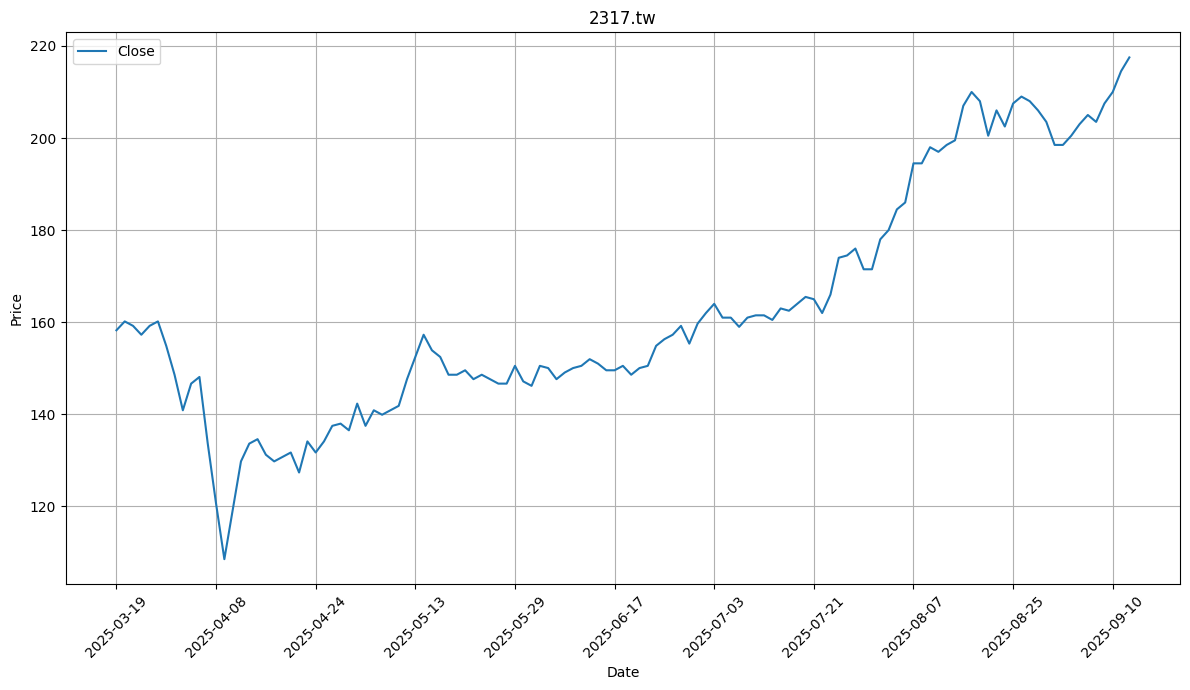

In [12]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

In [13]:
# 用來處理時間
from datetime import datetime, timedelta
# 解析網頁內容
from bs4 import BeautifulSoup

In [14]:
def yahoo_stock(stock_id):
    # 取得證交所網站資，帶入網址參數 date：時間，stock_id：股票代號
    url = f'https://tw.stock.yahoo.com/quote/{stock_id}.TW'

    # 使用 requests 取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用 Beautiful Soup 解析 HTML 內容
    soup = BeautifulSoup(html, 'html.parser')

    # 使用 find 與 find_all 定位 HTML 的標籤
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 time
    time_element = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('time')
    # HTML 標籤中的 section id=qsp-overview-realtime-info 下的 ul li
    table_soups = soup.find('section',\
                {'id': 'qsp-overview-realtime-info'}).find('ul')\
                                   .find_all('li')

    # 欄位資料
    fields = []
    # 放資料
    datas = []

    # 使用 for 迴圈取得表格中細部內容
    for table_soup in table_soups:

        # 表格中的 span 標籤
        table_datas = table_soup.find_all('span')

        for num, table_data in enumerate(table_datas):

            if table_data.text == '': # 表格內容空就跳過
                continue

            # 新增資料
            if num == 0:
                fields.append(table_data.text)
            else:
                datas.append(table_data.text)

    # 建立 DataFrame
    df = pd.DataFrame([datas], columns=fields)

    # 增加日期和股號欄位
    df.insert(0,'日期',time_element['datatime'])
    df.insert(1,'股號',stock_id)

    # 回傳 DataFrame
    return df


'''main'''

# "鴻海"股票代號
stock_id = '2317'

# 呼叫定義函數
yahoo_stock(stock_id)

,日期,股號,成交,開盤,最高,最低,均價,成交金額(億),昨收,漲跌幅,漲跌,總量,昨量,振幅
0,2025/09/15 14:30,2317,216.0,218.5,218.5,213.0,215.7,119.33,217.5,0.69%,1.50,"55,301","71,408",2.53%


In [26]:
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
words = url.split('/')
print(words)

k = words[-1]
print(k)

['https:', '', 'tw.stock.yahoo.com', 'quote', '2317', 'income-statement']
income-statement


In [17]:
# 函數可用於奇摩財報
def url_find(url):

    # 取得 url 的所有 route
    words = url.split('/')

    # 取得最後一個 route
    # 為了知道是損益表、資產負債表、現金流量表
    laset_word = words[-1]

    # 使用requests取得網頁內容
    response = requests.get(url)

    # 取得 HTML 文本
    html = response.content

    # 使用Beautiful Soup解析HTML內容
    soup = BeautifulSoup(html, 'html.parser')

    # 找到表格的表頭 qsp-incom-statment-table
    table_soup = soup.find('section', {'id': 'qsp-{}-table'.format(laset_word)})

    # 找到對應類別標籤
    table_fields=table_soup.find('div', class_='table-header')

    # 解析表頭內容
    table_fields_lines = list(table_fields.stripped_strings)


    # 找到對應的資料
    data_rows = table_soup.find_all('li' ,class_='List(n)')

    # 解析資料行內容
    data = []
    for row in data_rows:
        row_data = list(row.stripped_strings)
        data.append(row_data)

    # 建立 DataFrame
    df = pd.DataFrame(data, columns=table_fields_lines)
    return df

'''main'''

# 抓損益表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/income-statement'
# 抓資產負債表
# url = f'https://tw.stock.yahoo.com/quote/{stock_id}/balance-sheet'
# 抓現金流量表
url = f'https://tw.stock.yahoo.com/quote/{stock_id}/cash-flow-statement'

# 抓取季報表資料
df = url_find(url).transpose()

# 資料處理
df.columns = df.iloc[0]
df = df[1:]
df.insert(0, '年度/季別', df.index)
df.columns.name = None
df.reset_index(drop=True, inplace=True)

# 輸出資料後5筆
print(df)

      年度/季別         營業現金流         投資現金流         融資現金流         自由現金流  \
0   2025 Q2    72,939,050    24,197,157   -54,074,910    97,136,207   
1   2025 Q1   -51,063,465   -63,552,956    93,552,135  -114,616,421   
2   2024 Q4   184,662,484   -62,720,737    16,474,102   121,941,747   
3   2024 Q3   -62,419,616  -153,144,905   -43,992,561  -215,564,521   
4   2024 Q2    25,538,473   -92,873,232   -48,712,443   -67,334,759   
5   2024 Q1    18,247,498     8,693,056   -87,841,008    26,940,554   
6   2023 Q4   159,400,145   -82,761,154   -56,110,723    76,638,991   
7   2023 Q3    66,027,555   -36,346,749   -47,365,426    29,680,806   
8   2023 Q2    79,805,708   -14,144,787    24,956,793    65,660,921   
9   2023 Q1   140,319,309    -4,621,420   -82,118,967   135,697,889   
10  2022 Q4    13,165,058    -8,083,054  -148,787,232     5,082,004   
11  2022 Q3    64,616,746     5,971,112   -83,172,754    70,587,858   
12  2022 Q2   -29,725,461     5,751,899    70,109,243   -23,973,562   
13  20